STEP 1: IMPORT

In [42]:
# Import libraries and modules.

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px 
import seaborn as sns
import datetime

In [43]:
df_companies = pd.read_csv("Unicorn_Companies.csv")

STEP 2: Data Exploration

In [44]:
df_companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


Statistical properties of the dataset

In [45]:
# Get the shape of the dataset.

df_companies.shape

(1074, 10)

In [46]:
# Get the data types and number of non-null values in the dataset.

df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [47]:
# Get descriptive statistics such as mean, standard deviation, and range of the numerical columns in the dataset.

df_companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


Data Preprocessing

In [48]:
# Convert the `date` column to datetime.
df_companies['Date Joined'] = pd.to_datetime(df_companies['Date Joined'])


# Display the data types of the columns in `companies`
# to confirm that the update actually took place.

df_companies.dtypes

/tmp/ipykernel_1322694/2305722384.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

In [49]:
# Create a new column "Year Joined" from "Date Joined"
df_companies['Year Joined']= df_companies['Date Joined'].dt.year


# Display the first few rows of `companies`
# to confirm that the new column did get added.

df_companies.head()


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


In [51]:
# Define the `str_to_num()` function

df_companies["Valuation_Num"] =  df_companies["Valuation"].str.strip("$B").astype(float)


In [15]:
# Apply the `str_to_num()` function to the `Valuation` column
# and assign the result back to a new column called `valuation_num`

df_companies.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Year Joined,Valuation_Num
0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0,2017,140.0
1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN,2012,100.3
2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0,2014,95.0
3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0,2011,45.6
4,Epic Games,$42,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0,2018,42.0


Find missing values

In [52]:
# Find the number of missing values in each column in this dataset.
df_companies.isna().sum()


Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year Joined          0
Valuation_Num        0
dtype: int64

 Question: How many missing values are in each column in the dataset?

City = 16 missing values
Select Investors = 1 missing value



Review rows with missing values

In [53]:
# 1. Apply the `isna()` method to the `df_companies` dataframe and assign back to `mask`

# Create the mask
mask = df_companies.isna()
mask.tail()


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation_Num
1069,False,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False,False
1071,False,False,False,False,False,False,False,False,False,False,False,False
1072,False,False,False,False,False,False,False,False,False,False,False,False
1073,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
mask=mask.any(axis=1)
mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [55]:
# Display rows with missing values
df_missing_rows = df_companies[mask]
df_missing_rows

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation_Num
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32.0
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4.0
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3.0
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3.0
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3.0
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2.0
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2.0
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1.0
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1.0
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1.0


In [56]:
df_missing_rows= df_companies[mask]

Question: Is there a specific country/region that shows up a lot in this missing values dataframe? Which one?

    Twelve of the 17 rows with missing values are for companies from Singapore.

Question: What steps did you take to find missing data?

- `DataFrame.isna()` will return a Boolean dataframe indicating every location that is `NaN` with `True`

- You can use `sum()` in conjunction with `isna()` to get the counts of `NaN` values in each column.

- You can use `any()` in conjunction with `isna()` to create a Boolean mask, which can be applied to the original dataframe to obtain just the rows with at least one `NaN` value.

Question: What observations can be made about the forms and context of missing data?

- Missing values can take different forms and are usually context-specific. Not every missing value is labeled as `NaN` or `None`, or `Null`.

Question: What other methods could you use to address missing data?

- If possible, ask the business users for insight into the causes of missing values and, if possible, get domain knowledge to intelligently impute these values.



Step 3: Model building

Two ways to address missing values

There are several ways to address missing values, which is critical in EDA. The two primary methods are removing them and imputing other values in their place. Choosing the proper method depends on the business problem and the value the solution will add or take away from the dataset.

Here, you will try both.


In [57]:
# Store the total number of values in a variable called `count_total`

count_total = df_companies.size  
count_total


12888

In [58]:
# Drop the rows containing missing values, determine number of remaining values 
# Remove rows with missing values
df_dropna_rows = df_companies.dropna()

# Calculate the total number of remaining values
count_dropna_rows = df_dropna_rows.size
count_dropna_rows

12684

In [59]:
# Drop the columns containing missing values, determine number of remaining values

# Remove rows with missing values
df_dropna_columns = df_companies.dropna(axis=1)

# Calculate the total number of remaining values
count_dropna_columns = df_dropna_columns.size
count_dropna_columns

10740

In [60]:
# Print the percentage of values removed by dropping rows.

percentage_drop_rows= ((count_total - count_dropna_rows) / count_total)*100

percentage_drop_rows


1.5828677839851024

In [61]:
# Print the percentage of values removed by dropping columns.

percentage_drop_columns= ((count_total - count_dropna_columns) / count_total)*100

percentage_drop_columns


16.666666666666664

Question: Which method was most effective? Why?

The percentage removed was significantly higher for columns than it was for rows. Since both approaches result in a dataset with no missing values, the "most effective" method depends on how much data you have and what you want to do with it. It might be best to use the way that leaves the most data intact—in this case, dropping rows. Or, if you don't have many samples and don't want to lose any, but you don't need all your columns, then dropping columns might be best. With this data, it would probably be best to drop rows in the majority of cases.


In [62]:
# 1. Fill missing values using the 'fillna()' method, back-filling

df_companies_backfill = df_companies.fillna(method='backfill')


# 2. Show the rows that previously had missing values

df_companies_backfill.iloc[df_missing_rows.index, :]

/tmp/ipykernel_1322694/2080538910.py:3: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation_Num
12,FTX,$32B,2021-07-20,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32.0
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4.0
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3.0
251,Trax,$3B,2019-07-22,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3.0
325,Amber Group,$3B,2021-06-21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3.0
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2.0
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2.0
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1.0
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1.0
848,Matrixport,$1B,2021-06-01,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1.0


Question: Do the values that were used to fill in for the missing values make sense?

    No, the values seem to be added without consideration of the country those cities are located in.

Another option is to fill the values with a certain value, such as 'Unknown'. However, doing so doesn’t add any value to the dataset and could make finding the missing values difficult in the future. Reviewing the missing values in this dataset determines that it is fine to leave the values as they are. This also avoids adding bias to the dataset.


Step 4: Results and evaluation

In [63]:
# 1. Create a Boolean mask using conditional logic

### YOUR CODE HERE ###

cities = ['Beijing', 'San Francisco', 'London']
mask = (
    (df_companies['Industry']=='Hardware') & (df_companies['City'].isin(cities))
) | (
    (df_companies['Industry']=='Artificial intelligence') & (df_companies['City']=='London')
)

# 2. Apply the mask to the `df_companies` dataframe and assign the results to `df_invest`

### YOUR CODE HERE ###
df_invest = df_companies[mask]
df_invest

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Valuation_Num
36,Bitmain,$12B,2018-07-06,Hardware,Beijing,China,Asia,2015,$765M,"Coatue Management, Sequoia Capital China, IDG ...",2018,12.0
43,Global Switch,$11B,2016-12-22,Hardware,London,United Kingdom,Europe,1998,$5B,"Aviation Industry Corporation of China, Essenc...",2016,11.0
147,Chipone,$5B,2021-12-16,Hardware,Beijing,China,Asia,2008,$1B,"China Grand Prosperity Investment, Silk Road H...",2021,5.0
845,Density,$1B,2021-11-10,Hardware,San Francisco,United States,North America,2014,$217M,"Founders Fund, Upfront Ventures, 01 Advisors",2021,1.0
873,BenevolentAI,$1B,2015-06-02,Artificial intelligence,London,United Kingdom,Europe,2013,$292M,Woodford Investment Management,2015,1.0
923,Geek+,$1B,2018-11-21,Hardware,Beijing,China,Asia,2015,$439M,"Volcanics Ventures, Vertex Ventures China, War...",2018,1.0
1040,TERMINUS Technology,$1B,2018-10-25,Hardware,Beijing,China,Asia,2015,$623M,"China Everbright Limited, IDG Capital, iFLYTEK",2018,1.0
1046,Tractable,$1B,2021-06-16,Artificial intelligence,London,United Kingdom,Europe,2014,$120M,"Insight Partners, Ignition Partners, Georgian ...",2021,1.0


In [64]:
# Group the data by`Country/Region`

national_valuations = df_companies.groupby(['Country/Region'])['Valuation_Num'].sum().sort_values(ascending=False).reset_index()

# Print the top 15 values of the DataFrame.

national_valuations.head(15)

,Country/Region,Valuation_Num
0,United States,1933.0
1,China,696.0
2,India,196.0
3,United Kingdom,195.0
4,Germany,72.0
5,Sweden,63.0
6,Australia,56.0
7,France,55.0
8,Canada,49.0
9,South Korea,41.0


In [65]:
# Remove outlying countries

national_valuations_no_big4 = national_valuations.iloc[4:, :]
national_valuations_no_big4.head(10)

,Country/Region,Valuation_Num
4,Germany,72.0
5,Sweden,63.0
6,Australia,56.0
7,France,55.0
8,Canada,49.0
9,South Korea,41.0
10,Israel,39.0
11,Brazil,37.0
12,Bahamas,32.0
13,Indonesia,28.0


In [66]:
# (Optional) Use `isin()` to create a Boolean mask to accomplish the same task

mask = ~national_valuations['Country/Region'].isin(['United States', 'China', 'India', 'United Kingdom'])
national_valuations_no_big4 = national_valuations[mask]
national_valuations_no_big4.head()

,Country/Region,Valuation_Num
4,Germany,72.0
5,Sweden,63.0
6,Australia,56.0
7,France,55.0
8,Canada,49.0


Create barplot for top 20 non-big-4 countries

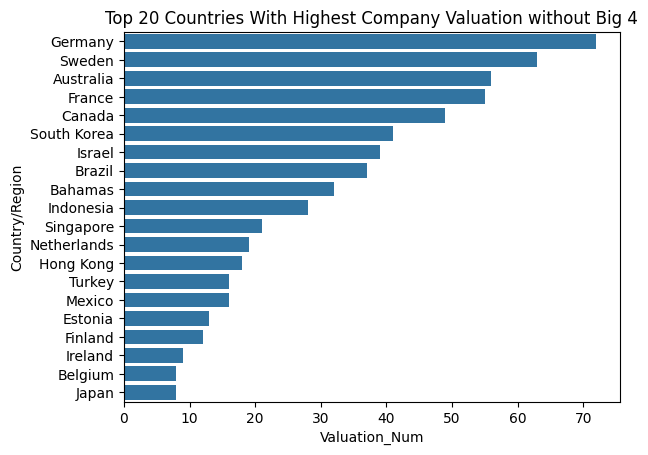

In [68]:
# Create a barplot to compare the top 20 countries with highest company valuations.

sns.barplot(data=national_valuations_no_big4.head(20), y='Country/Region', x='Valuation_Num')
plt.title('Top 20 Countries With Highest Company Valuation without Big 4')
plt.show();


In [70]:
# Plot the sum of valuations per country.
data = national_valuations_no_big4

px.scatter_geo(data, 
               locations='Country/Region', 
               size='Valuation_Num', 
               locationmode='country names', 
               color='Country/Region',
               title='Total company valuations by country (non-big-four)')

